In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
iot_data = pd.read_csv(R"C:\Users\shraddhavasa\Downloads\sensor-data.csv")
iot_data.head()

,time,power,temp,humidity,light,CO2,dust
0,2015-08-01 00:00:28,0.0,32,40,0,973,27.80
1,2015-08-01 00:00:58,0.0,32,40,0,973,27.09
2,2015-08-01 00:01:28,0.0,32,40,0,973,34.50
3,2015-08-01 00:01:58,0.0,32,40,0,973,28.43
4,2015-08-01 00:02:28,0.0,32,40,0,973,27.58


In [3]:
iot_data.describe()

,power,temp,humidity,light,CO2,dust
count,88688.000000,88688.000000,88688.000000,88688.000000,88688.000000,88688.000000
mean,-0.408166,33.256720,32.755852,7.760903,1801.426337,12.305680
std,0.580013,1.370248,3.933947,10.784873,358.235124,10.117284
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,32.000000,30.000000,0.000000,1786.000000,5.360000
50%,0.000000,33.000000,31.000000,1.000000,2000.000000,9.980000
75%,0.000000,34.000000,35.000000,13.000000,2000.000000,16.510000
max,3.080000,36.000000,47.000000,50.000000,2994.000000,357.350000


In [4]:
# Check for missing values
print("\nMissing values in IoT sensor data:")
iot_data.isnull().sum()


Missing values in IoT sensor data:


time        0
power       0
temp        0
humidity    0
light       0
CO2         0
dust        0
dtype: int64

In [5]:
# Correlation analysis
print("\nCorrelation matrix of IoT sensor data:")



Correlation matrix of IoT sensor data:


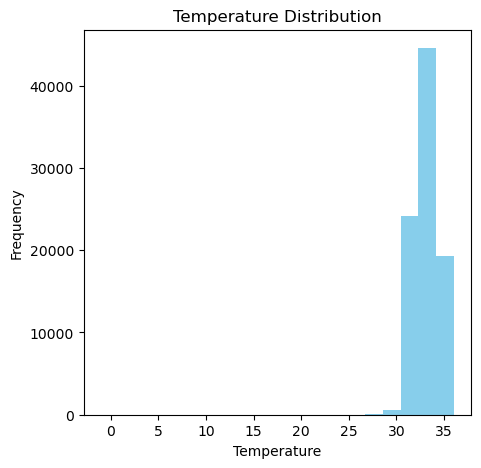

In [6]:
# Plotting a histogram of a specific sensor data
plt.figure(figsize=(5,5))
plt.hist(iot_data['temp'], bins=20, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

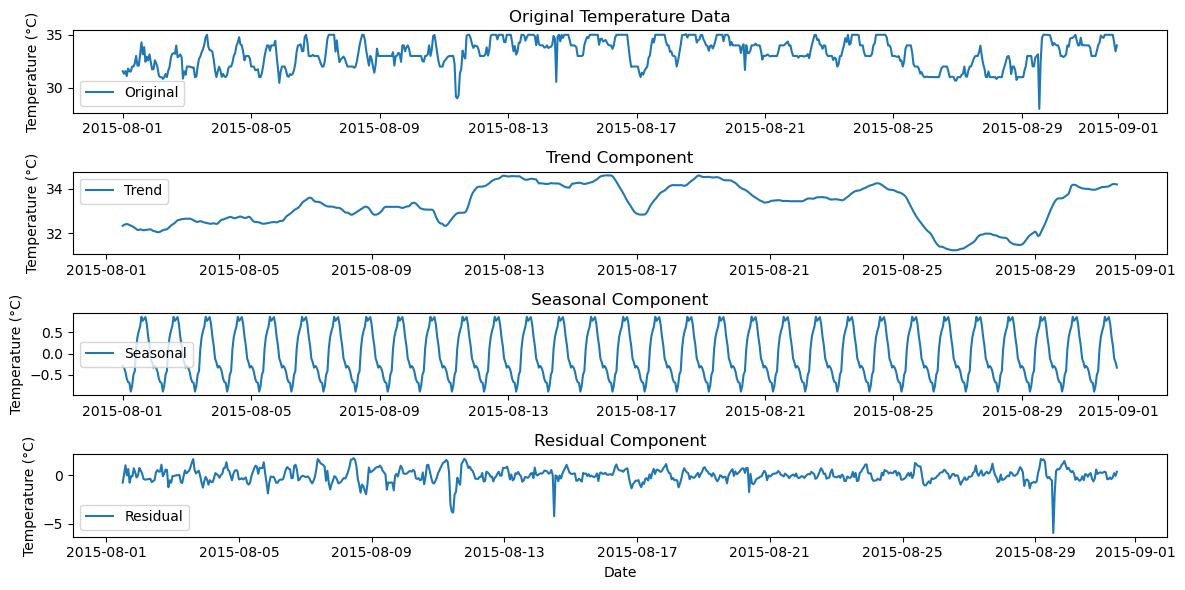

In [7]:
# Convert the 'timestamp' column to datetime format
iot_data['time'] = pd.to_datetime(iot_data['time'])

# Set 'timestamp' column as the index of the DataFrame
iot_data.set_index('time', inplace=True)

# Resample the data to hourly frequency (assuming data is not already in hourly frequency)
iot_data_hourly = iot_data.resample('H').mean()

# Perform seasonal decomposition on the temperature data
decomposition = seasonal_decompose(iot_data_hourly['temp'], model='additive')

# Plot the original temperature data
plt.figure(figsize=(12, 6))
plt.subplot(4, 1, 1)
plt.plot(iot_data_hourly.index, iot_data_hourly['temp'], label='Original')
plt.title('Original Temperature Data')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend.index, decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid.index, decomposition.resid, label='Residual')
plt.title('Residual Component')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.legend()

plt.tight_layout()
plt.show()


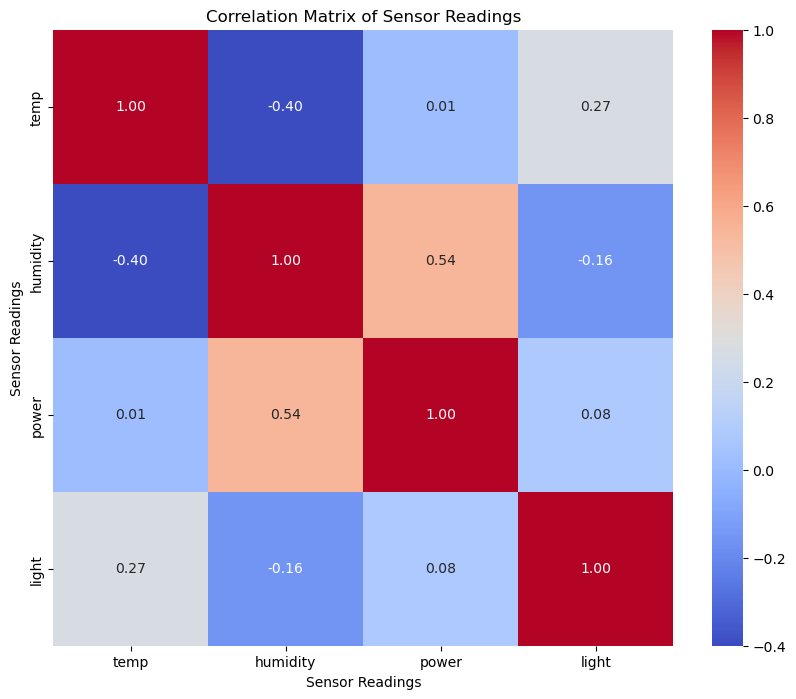

In [8]:
iot_data = pd.read_csv(R"C:\Users\shraddhavasa\Downloads\sensor-data.csv")

iot_data['time'] = pd.to_datetime(iot_data['time'])

# Set 'timestamp' column as the index of the DataFrame
iot_data.set_index('time', inplace=True)

# Let's select a subset of sensor readings for correlation analysis
selected_columns = ['temp', 'humidity', 'power', 'light']

# Calculate the correlation matrix
correlation_matrix = iot_data[selected_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sensor Readings')
plt.xlabel('Sensor Readings')
plt.ylabel('Sensor Readings')
plt.show()